In [2]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
)

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [3]:
class_names = train_dataset.class_names
class_names

['cat', 'dog']

2025-08-06 10:32:56.204268: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


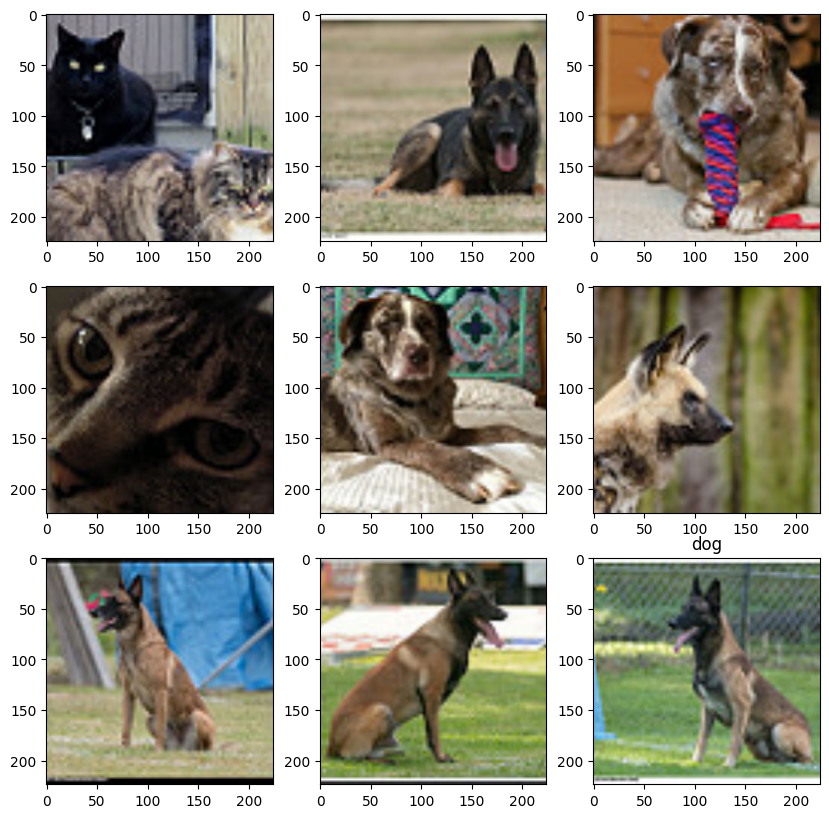

In [12]:
import matplotlib.pyplot as plt

def display_images(dataset):
    plt.figure(figsize=(10, 10))

    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

display_images(train_dataset)

In [7]:
# 画像の水増しをする関数の定義
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [8]:
for extra_train_dataset in [
    train_dataset.map(flip_left_right),
    train_dataset.map(flip_up_down),
    train_dataset.map(rot90),
    train_dataset.map(rot180),
    train_dataset.map(rot270),
]:
    train_dataset = train_dataset.concatenate(extra_train_dataset)

In [9]:
train_dataset = train_dataset.shuffle(32)

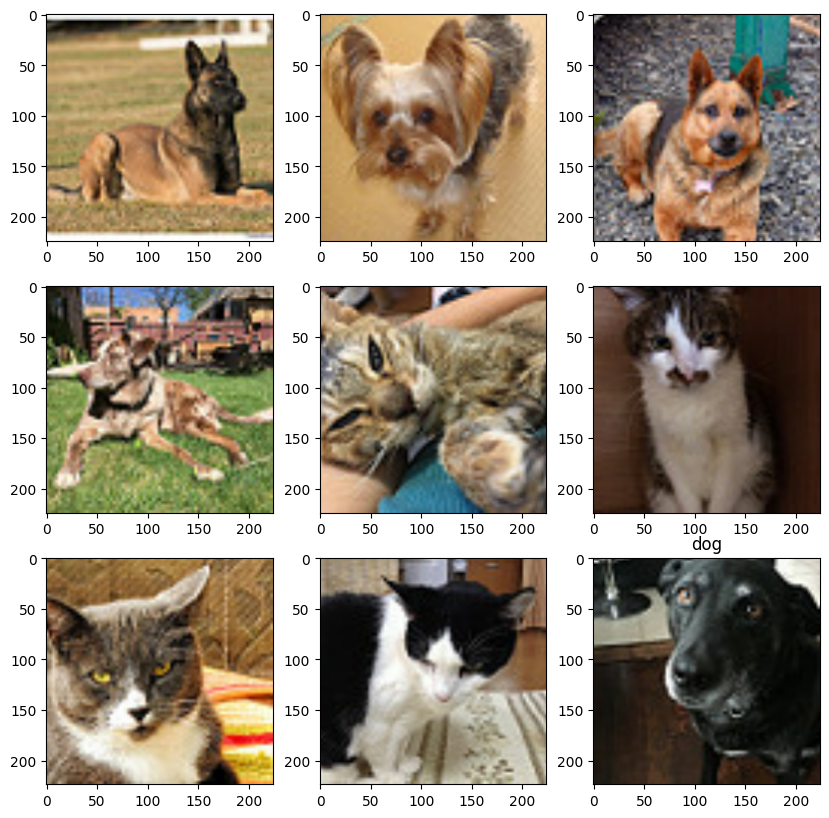

In [13]:
display_images(train_dataset)

In [14]:
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

In [15]:
# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [16]:
# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [17]:
# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [18]:
# modelに学習させる
model.fit(train_dataset, epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.8072 - loss: 0.4229
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9222 - loss: 0.2209
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9456 - loss: 0.1702
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9567 - loss: 0.1386
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9689 - loss: 0.1181
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9783 - loss: 0.1016
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9794 - loss: 0.0888
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9856 - loss: 0.0810
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9867 - loss: 0.0726
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9889 - loss: 0.0638
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9928 - loss: 0.0582
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step

In [19]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


In [20]:
# 分類した結果を確認する
pred_data

array([[3.76569078e-05],
       [2.25073600e-04],
       [5.05497519e-05],
       [1.17938232e-03],
       [3.47683992e-04],
       [2.71121797e-04],
       [6.68615859e-04],
       [7.27291976e-04],
       [1.20596160e-05],
       [2.50540761e-04],
       [4.62190983e-05],
       [3.85567313e-03],
       [3.08531150e-03],
       [3.19524755e-04],
       [1.02281425e-04],
       [1.16444699e-05],
       [1.38633113e-04],
       [5.59425738e-04],
       [2.97543244e-03],
       [1.86155213e-03],
       [4.83031943e-03],
       [1.26771554e-01],
       [3.43313091e-03],
       [5.50634810e-04],
       [2.43857756e-01],
       [8.65504495e-04],
       [7.92691950e-04],
       [9.36882861e-04],
       [1.14249429e-02],
       [2.15298933e-04],
       [9.00486077e-04],
       [6.68860257e-01],
       [2.16446599e-04],
       [7.97223474e-04],
       [3.82312830e-03],
       [8.65037441e-01],
       [4.43295948e-03],
       [1.23050925e-03],
       [2.33299099e-02],
       [2.30245991e-04],


In [21]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9600 - loss: 0.0651 


[0.06511449068784714, 0.9599999785423279]